In [8]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib import rc
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.style.use(['science', 'no-latex'])
plt.rcParams['ps.useafm'] = True
plt.rcParams["savefig.dpi"] = "300"
fontdict = {
    'family': 'sans-serif',
    'sans-serif': ['Arial'],
    'weight': 'bold',
    'size': 14
}
rc('font', **fontdict)
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.rm'] = 'serif'
from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['brown', 'teal', 'forestgreen', 'purple'])




In [9]:
dir = "C:/Users/wangluhui/Documents/Works/Temporary/ecci-exps/5min/compression/"
# dir = "compression/"

import glob
import numpy as np
import pandas as pd
from tinydb import TinyDB,Query
import os
from functools import reduce
import copy

q=Query()

np.set_printoptions(precision=3)

results_dirs=glob.glob(dir+"*[0-9]*")

results = [
    TinyDB(os.path.join(dir, "statistics.json")).all()
    if os.path.exists(os.path.join(dir, "statistics.json")) else []
    for dir in results_dirs
]

results = reduce(lambda x, y: x.extend(y) or x, results)

len(results)
eil_statistics=[]
all_eils=[]
accuracy_statistics=[]
for result in results:
    statistics={}
    statistics['scenario'] = result['scenario']
    statistics['interval'] = result['interval']
    statistics['delay'] = result['delay']
    statistics['compressed'] = result['compressed']
    statistics['compressed_quality'] = result['compressed_quality']
    statistics['network']= result['bandwidth']+"|"+result['delay']
    eils=result['eils']
    arr = np.array(eils)
    statistics['count'] = len(arr)
    statistics['id'] = "-".join(
        [statistics['scenario'], statistics['network'], str(statistics['count'])])

    statistics['mean']=np.around(np.mean(arr),3)
    statistics['std']=np.around(np.std(arr),3)
    statistics['min']=np.around(np.min(arr),3)
    statistics['25%']=np.around(np.quantile(arr,.25),3)
    statistics['50%'] = np.around(np.quantile(arr, .5),3)
    statistics['75%'] = np.around(np.quantile(arr, .75),3)
    statistics['max']=np.around(np.max(arr))
    all_eils.extend([{
        'id': statistics['id'],
        'scenario': statistics['scenario'],
        'interval': statistics['interval'],
        'network': statistics['network'],
        'delay':statistics['delay'] ,
        'compressed': statistics['compressed'],
        'compressed_quality':statistics['compressed_quality'],
        'eil': eil
    } for eil in eils])
    statistics.pop('id')
    eil_statistics.append(statistics)
    statistics=copy.deepcopy(result)
    statistics.pop("bandwidth")
    statistics['compressed'] = result['compressed']
    statistics['compressed_quality'] = result['compressed_quality']
    statistics['network'] = result['bandwidth'] + "|" + result['delay']
    statistics["bandwidth_consumed"] = (10**(
        -6)) * statistics["bandwidth_consumed"]
    statistics.pop('eils')
    accuracy_statistics.append(statistics)


In [10]:
accuracy=pd.DataFrame(accuracy_statistics)
accuracy = accuracy[[
    "scenario",
    "interval",
    'compressed',
    'compressed_quality',
    "network",
    "delay",
    "f1_score",
    "f2_score",
    "bandwidth_consumed",
    "tp",
    "fp",
    "tn",
    "fn",
    "precision",
    "recall",
    "total",
]]
accuracy=accuracy.rename(columns={
    "bandwidth_consumed": "bw (GB)"
})


In [11]:
pd.DataFrame(accuracy)

,scenario,interval,compressed,compressed_quality,network,delay,f1_score,f2_score,bw (GB),tp,fp,tn,fn,precision,recall,total
0,CI,0.1,False,100,20Mbps|50ms,50ms,1.000000,1.000000,1.414950,3711,0,8949,0,1.000000,1.000000,12660
1,EI,0.1,False,100,20Mbps|50ms,50ms,0.364812,0.268214,0.004063,846,81,8868,2865,0.912621,0.227971,12660
2,ACE,0.1,False,100,20Mbps|50ms,50ms,0.824733,0.756568,0.281876,2661,81,8868,1050,0.970460,0.717057,12660
3,ACE+,0.1,False,100,20Mbps|50ms,50ms,0.868551,0.814815,0.554262,2904,72,8877,807,0.975806,0.782538,12660
4,CI,0.1,True,100,20Mbps|50ms,50ms,0.982343,0.986619,0.442692,3672,93,8856,39,0.975299,0.989491,12660
5,EI,0.1,True,100,20Mbps|50ms,50ms,0.364812,0.268214,0.004101,846,81,8868,2865,0.912621,0.227971,12660
6,ACE,0.1,True,100,20Mbps|50ms,50ms,0.817084,0.750213,0.092347,2640,111,8838,1071,0.959651,0.711399,12660
7,ACE+,0.1,True,100,20Mbps|50ms,50ms,0.846512,0.792505,0.168027,2821,133,8816,890,0.954976,0.760172,12660
8,CI,0.1,True,90,20Mbps|50ms,50ms,0.975865,0.978699,0.158049,3639,108,8841,72,0.971177,0.980598,12660
9,EI,0.1,True,90,20Mbps|50ms,50ms,0.364812,0.268214,0.004092,846,81,8868,2865,0.912621,0.227971,12660


In [12]:
pd.DataFrame(eil_statistics)

,scenario,interval,delay,compressed,compressed_quality,network,count,mean,std,min,25%,50%,75%,max
0,CI,0.1,50ms,False,100,20Mbps|50ms,12660,3.665,4.350,0.076,0.305,1.572,6.158,17.0
1,EI,0.1,50ms,False,100,20Mbps|50ms,12660,0.313,0.208,0.085,0.176,0.254,0.392,2.0
2,ACE,0.1,50ms,False,100,20Mbps|50ms,12660,0.422,0.515,0.087,0.195,0.296,0.456,6.0
3,ACE+,0.1,50ms,False,100,20Mbps|50ms,12660,0.341,0.226,0.080,0.187,0.278,0.424,2.0
4,CI,0.1,50ms,True,100,20Mbps|50ms,12660,3.777,3.759,0.075,0.364,1.995,7.300,12.0
5,EI,0.1,50ms,True,100,20Mbps|50ms,12660,0.923,1.494,0.086,0.210,0.356,0.736,10.0
6,ACE,0.1,50ms,True,100,20Mbps|50ms,12660,1.446,4.353,0.082,0.228,0.361,0.602,34.0
7,ACE+,0.1,50ms,True,100,20Mbps|50ms,12660,0.444,0.520,0.073,0.179,0.284,0.485,6.0
8,CI,0.1,50ms,True,90,20Mbps|50ms,12660,3.118,3.325,0.071,0.303,1.659,5.454,12.0
9,EI,0.1,50ms,True,90,20Mbps|50ms,12660,1.959,5.486,0.086,0.214,0.356,0.724,43.0


C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/370420338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_origin['quality'] = '-'
C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/370420338.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_100['quality'] = '100%'
C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/370420338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

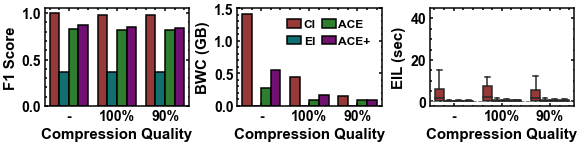

In [13]:
def plot():
    fig, axes = plt.subplots(1,
                             3,
                             gridspec_kw={'width_ratios': [1, 1, 1]},
                             sharex=True,
                             sharey=False,
                             figsize=(8, 2))


    data = pd.DataFrame(accuracy_statistics)
    quality_origin = data.query('compressed == False')
    quality_100 = data.query('compressed == True & compressed_quality == 100 ')
    quality_90 = data.query('compressed == True & compressed_quality == 90 ')
    quality_origin['quality'] = '-'
    quality_100['quality'] = '100%'
    quality_90['quality'] = '90%'
    data = pd.concat([quality_origin, quality_100, quality_90])
    g1 = sns.barplot(x="quality",
                     y='f1_score',
                     data=data,
                     hue='scenario',
                     edgecolor='black',
                     order=["-", "100%", "90%"],
                     linewidth=1.5,
                     hue_order=["CI", "EI", "ACE", "ACE+"],
                     ax=axes[0])
    g1.get_legend().set_visible(False)
    g1.tick_params(axis='x', which="both", width=1.5)
    g1.tick_params(axis='y', which="both", width=1.5)
    g1.spines['left'].set_linewidth(1.5)
    g1.spines['right'].set_linewidth(1.5)
    g1.spines['top'].set_linewidth(1.5)
    g1.spines['bottom'].set_linewidth(1.5)
    g1.set_xlabel('Compression Quality', fontweight="bold", fontsize="15")
    g1.set_ylabel('F1 Score', fontweight="bold", fontsize="15")

    g3 = sns.barplot(x="quality",
                     y='bandwidth_consumed',
                     data=data,
                     hue='scenario',
                     edgecolor='black',
                     order=["-", "100%", "90%"],
                     linewidth=1.5,
                     hue_order=["CI", "EI", "ACE", "ACE+"],
                     ax=axes[1])
    g3.get_legend().set_visible(False)
    g3.tick_params(axis='x', which="both", width=1.5)
    g3.tick_params(axis='y', which="both", width=1.5)
    g3.spines['left'].set_linewidth(1.5)
    g3.spines['right'].set_linewidth(1.5)
    g3.spines['top'].set_linewidth(1.5)
    g3.spines['bottom'].set_linewidth(1.5)
    g3.set_xlabel('Compression Quality', fontweight="bold", fontsize="15")
    g3.set_ylabel('BWC (GB)', fontweight="bold", fontsize="15")
    g3.legend(
        loc="upper right",
        fontsize='12',
        handlelength=1.2,
        ncol=2,
        frameon=False,
        columnspacing=0.5,
        handletextpad=0.2,
    )
    g3.set_ylim(0,1.5)


    data = pd.DataFrame(all_eils)
    quality_origin=data.query('compressed == False')
    quality_100 = data.query('compressed == True & compressed_quality == 100 ')
    quality_90 = data.query(
        'compressed == True & compressed_quality == 90 ')
    quality_origin['quality']='-'
    quality_100['quality'] = '100%'
    quality_90['quality'] = '90%'
    data = pd.concat([quality_origin, quality_100, quality_90])

    g5 = sns.boxplot(x="quality",
                    y='eil',
                    data=data,
                    order=["-","100%","90%"],
                    hue='scenario',
                    fliersize=0,
                    linewidth=1.5,
                    hue_order=["CI", "EI", "ACE", "ACE+"],
                    ax=axes[2])
    g5.get_legend().set_visible(False)

    g5.tick_params(axis='x', which="both", width=1.5)
    g5.tick_params(axis='y', which="both", width=1.5)
    g5.spines['left'].set_linewidth(1.5)
    g5.spines['right'].set_linewidth(1.5)
    g5.spines['top'].set_linewidth(1.5)
    g5.spines['bottom'].set_linewidth(1.5)
    g5.set_xlabel('Compression Quality', fontweight="bold", fontsize="15")
    g5.set_ylabel('EIL (sec)', fontweight="bold", fontsize="15")
    # g5.set_yscale('log')
    # g5.set_ylim(0.05)
    g5.axhline(y=0.3, linewidth=1, color='grey', linestyle='--')

    # plt.subplots_adjust(wspace =0.5, hspace =0.3)#调整子图间距
    fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0)  #调整整体空白
    return fig, axes


fig, axes = plot()
fig.savefig('compression.pdf')
fig.savefig('compression.png')
# plt.show()

C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/652268591.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_origin['quality'] = '-'
C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/652268591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_100['quality'] = '100%'
C:\Users\WANGLU~1\AppData\Local\Temp/ipykernel_22676/652268591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

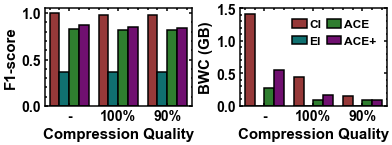

In [14]:


def plot():
    fig, axes = plt.subplots(1,
                             2,
                             gridspec_kw={'width_ratios': [1, 1]},
                             sharex=True,
                             sharey=False,
                             figsize=(5.4, 2))

    data = pd.DataFrame(accuracy_statistics)
    quality_origin = data.query('compressed == False')
    quality_100 = data.query('compressed == True & compressed_quality == 100 ')
    quality_90 = data.query('compressed == True & compressed_quality == 90 ')
    quality_origin['quality'] = '-'
    quality_100['quality'] = '100%'
    quality_90['quality'] = '90%'
    data = pd.concat([quality_origin, quality_100, quality_90])
    g1 = sns.barplot(x="quality",
                     y='f1_score',
                     data=data,
                     hue='scenario',
                     edgecolor='black',
                     order=["-", "100%", "90%"],
                     linewidth=1.5,
                     hue_order=["CI", "EI", "ACE", "ACE+"],
                     ax=axes[0])
    g1.get_legend().set_visible(False)
    g1.tick_params(axis='x', which="both", width=1.5)
    g1.tick_params(axis='y', which="both", width=1.5)
    g1.spines['left'].set_linewidth(1.5)
    g1.spines['right'].set_linewidth(1.5)
    g1.spines['top'].set_linewidth(1.5)
    g1.spines['bottom'].set_linewidth(1.5)
    g1.set_xlabel('Compression Quality', fontweight="bold", fontsize="15")
    g1.set_ylabel('F1-score', fontweight="bold", fontsize="15")

    g3 = sns.barplot(x="quality",
                     y='bandwidth_consumed',
                     data=data,
                     hue='scenario',
                     edgecolor='black',
                     order=["-", "100%", "90%"],
                     linewidth=1.5,
                     hue_order=["CI", "EI", "ACE", "ACE+"],
                     ax=axes[1])
    g3.get_legend().set_visible(False)
    g3.tick_params(axis='x', which="both", width=1.5)
    g3.tick_params(axis='y', which="both", width=1.5)
    g3.spines['left'].set_linewidth(1.5)
    g3.spines['right'].set_linewidth(1.5)
    g3.spines['top'].set_linewidth(1.5)
    g3.spines['bottom'].set_linewidth(1.5)
    g3.set_xlabel('Compression Quality', fontweight="bold", fontsize="15")
    g3.set_ylabel('BWC (GB)', fontweight="bold", fontsize="15")
    g3.legend(
        loc="upper right",
        fontsize='12',
        handlelength=1.2,
        ncol=2,
        frameon=False,
        columnspacing=0.5,
        handletextpad=0.2,
    )
    g3.set_ylim(0,1.5)
    
    # plt.subplots_adjust(wspace =0.5, hspace =0.3)#调整子图间距
    fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0)  #调整整体空白
    return fig, axes


fig, axes = plot()
fig.savefig('compression_without_eil.pdf')
fig.savefig('compression_without_eil.png')
# plt.show()